# PROYECTO FINAL SISTEMAS INTELIGENTES

In [29]:
import pandas as pd
import seaborn as sns

train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

train_df.head()


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [2]:
train_df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [3]:
satisfaction_values = train_df['satisfaction'].value_counts()
missing_values = train_df.isnull().sum()
numeric_stats = train_df.describe()
categorical_stats = train_df.describe(include=['object'])
satisfaction_values, missing_values, numeric_stats, categorical_stats


(satisfaction
 neutral or dissatisfied    58879
 satisfied                  45025
 Name: count, dtype: int64,
 id                                     0
 Gender                                 0
 Customer Type                          0
 Age                                    0
 Type of Travel                         0
 Class                                  0
 Flight Distance                        0
 Inflight wifi service                  0
 Departure/Arrival time convenient      0
 Ease of Online booking                 0
 Gate location                          0
 Food and drink                         0
 Online boarding                        0
 Seat comfort                           0
 Inflight entertainment                 0
 On-board service                       0
 Leg room service                       0
 Baggage handling                       0
 Checkin service                        0
 Inflight service                       0
 Cleanliness                            0
 Departu

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load data
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')


# fill missing values
train_df['Arrival Delay in Minutes'].fillna(train_df['Arrival Delay in Minutes'].median(), inplace=True)


X = train_df.drop(['id', 'satisfaction'], axis=1)
y = train_df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

# train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# identify categorical and numerical
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# pipeline of preprocessor
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Aplicar preprocesamiento
X_train_processed = pipeline.fit_transform(X_train)
X_val_processed = pipeline.transform(X_val)

X_train_processed.shape, X_val_processed.shape

C:\Users\jonat\AppData\Local\Temp\ipykernel_21748\2345741662.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Arrival Delay in Minutes'].fillna(train_df['Arrival Delay in Minutes'].median(), inplace=True)


((83123, 27), (20781, 27))

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# model compile
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# train the model
history = model.fit(X_train_processed, y_train, epochs=50, batch_size=32, 
                    validation_data=(X_val_processed, y_val), callbacks=[early_stopping], verbose=1)

#save the model
model.save('trained_model.h5')



Epoch 1/50


c:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2598/2598 ━━━━━━━━━━━━━━━━━━━━ 3s 794us/step - accuracy: 0.8982 - loss: 0.2517 - val_accuracy: 0.9447 - val_loss: 0.1348
Epoch 2/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 2s 806us/step - accuracy: 0.9465 - loss: 0.1278 - val_accuracy: 0.9524 - val_loss: 0.1139
Epoch 3/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 2s 764us/step - accuracy: 0.9536 - loss: 0.1105 - val_accuracy: 0.9545 - val_loss: 0.1045
Epoch 4/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 2s 755us/step - accuracy: 0.9564 - loss: 0.1037 - val_accuracy: 0.9572 - val_loss: 0.1014
Epoch 5/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 2s 772us/step - accuracy: 0.9581 - loss: 0.0978 - val_accuracy: 0.9581 - val_loss: 0.0967
Epoch 6/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 2s 807us/step - accuracy: 0.9616 - loss: 0.0911 - val_accuracy: 0.9576 - val_loss: 0.0988
Epoch 7/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 2s 767us/step - accuracy: 0.9623 - loss: 0.0893 - val_accuracy: 0.9592 - val_loss: 0.0974
Epoch 8/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 2s 782us/step - accuracy: 0.9633 - loss: 0.08

In [7]:
#load the model
loaded_model = tf.keras.models.load_model('trained_model.h5')

In [8]:
#preprocessing
test_df['Arrival Delay in Minutes'].fillna(train_df['Arrival Delay in Minutes'].median(), inplace=True)
X_test = test_df.drop(['id'], axis=1)
X_test_processed = pipeline.transform(X_test)

C:\Users\jonat\AppData\Local\Temp\ipykernel_21748\4293271361.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Arrival Delay in Minutes'].fillna(train_df['Arrival Delay in Minutes'].median(), inplace=True)


In [9]:
#make predictions
test_predictions = loaded_model.predict(X_test_processed)
test_predictions = (test_predictions > 0.5).astype(int)

812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step


In [10]:
output = pd.DataFrame({'id': test_df['id'], 'satisfaction': test_predictions.flatten()})
output.to_csv('test_predictions.csv', index=False)

In [11]:
val_loss, val_accuracy = loaded_model.evaluate(X_val_processed, y_val, verbose=0)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

Validation Loss: 0.08854137361049652
Validation Accuracy: 0.9616957902908325


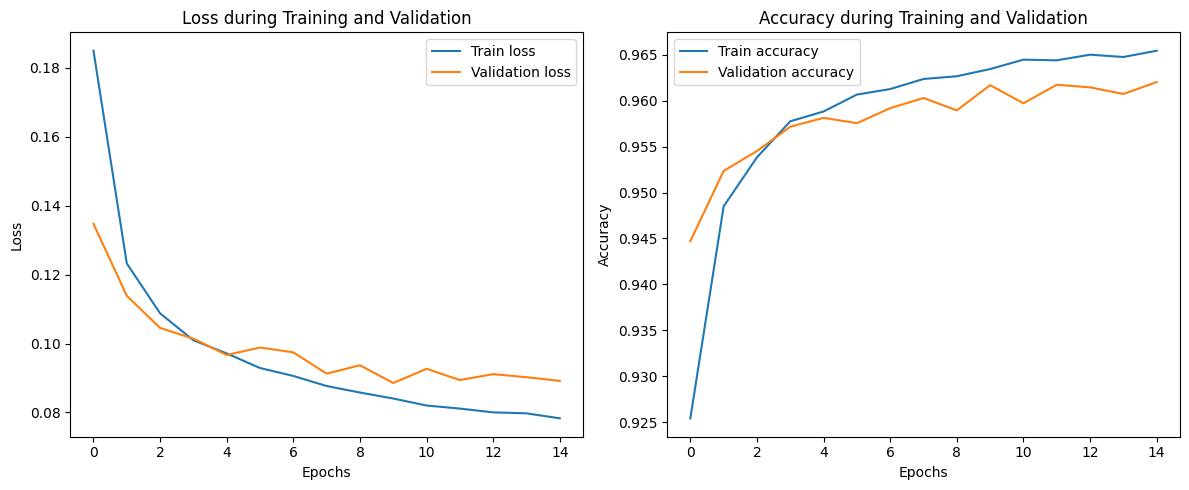

In [13]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss during Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# validation and accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train accuracy ')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy during Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

#model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# train the model
history = model.fit(X_train_processed, y_train, epochs=50, batch_size=32, 
                    validation_data=(X_val_processed, y_val), callbacks=[early_stopping], verbose=1)

#save the model
model.save('trained_model_2.h5')



Epoch 1/50


c:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2598/2598 ━━━━━━━━━━━━━━━━━━━━ 3s 874us/step - accuracy: 0.7893 - loss: 0.4580 - val_accuracy: 0.9232 - val_loss: 0.1935
Epoch 2/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - accuracy: 0.9052 - loss: 0.2477 - val_accuracy: 0.9408 - val_loss: 0.1512
Epoch 3/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 2s 911us/step - accuracy: 0.9217 - loss: 0.2042 - val_accuracy: 0.9447 - val_loss: 0.1386
Epoch 4/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 2s 898us/step - accuracy: 0.9277 - loss: 0.1855 - val_accuracy: 0.9480 - val_loss: 0.1266
Epoch 5/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step - accuracy: 0.9336 - loss: 0.1697 - val_accuracy: 0.9500 - val_loss: 0.1204
Epoch 6/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 2s 865us/step - accuracy: 0.9373 - loss: 0.1635 - val_accuracy: 0.9496 - val_loss: 0.1204
Epoch 7/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step - accuracy: 0.9387 - loss: 0.1601 - val_accuracy: 0.9514 - val_loss: 0.1134
Epoch 8/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 3s 955us/step - accuracy: 0.9385 - loss: 0.16

In [20]:
#load the model
loaded_model_2 = tf.keras.models.load_model('trained_model_2.h5')

In [21]:
#preprocessing
test_df['Arrival Delay in Minutes'].fillna(train_df['Arrival Delay in Minutes'].median(), inplace=True)
X_test = test_df.drop(['id'], axis=1)
X_test_processed = pipeline.transform(X_test)

C:\Users\jonat\AppData\Local\Temp\ipykernel_21748\4293271361.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Arrival Delay in Minutes'].fillna(train_df['Arrival Delay in Minutes'].median(), inplace=True)


In [22]:
test_predictions_2 = loaded_model_2.predict(X_test_processed)
test_predictions_2 = (test_predictions_2 > 0.5).astype(int)

812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step


In [23]:
output_2 = pd.DataFrame({'id': test_df['id'], 'satisfaction': test_predictions_2.flatten()})
output_2.to_csv('test_predictions_2.csv', index=False)

In [24]:
val_loss, val_accuracy = loaded_model_2.evaluate(X_val_processed, y_val, verbose=0)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

Validation Loss: 0.0967164859175682
Validation Accuracy: 0.9577017426490784


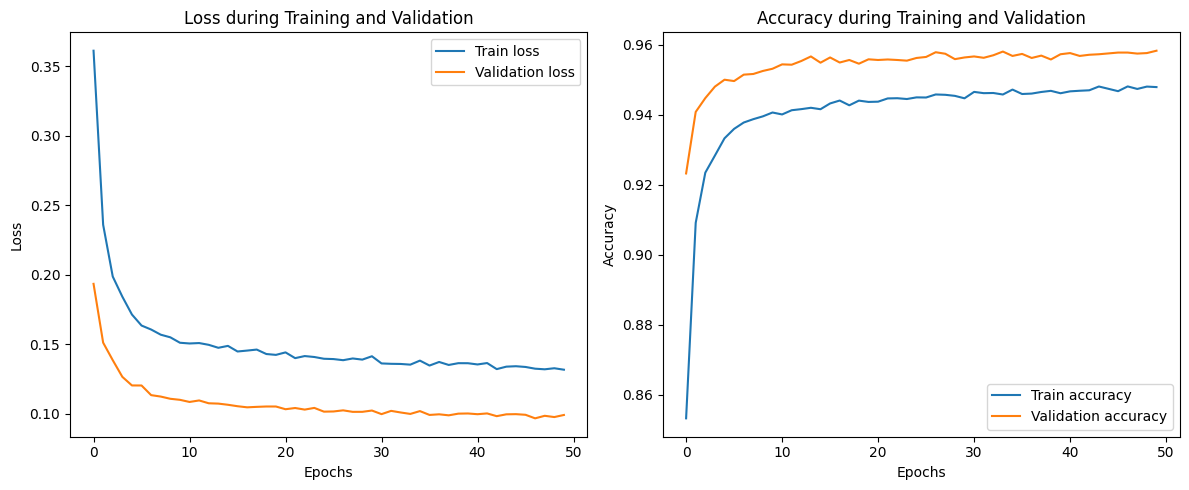

In [25]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss during Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# validation and accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train accuracy ')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy during Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix
def calculate_metrics(y_true, y_pred):

    # Matriz de confusión
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    # Precision
    precision = tp / (tp + fp)
    # Recall (Sensibilidad)
    recall = tp / (tp + fn)
    # Specificity
    specificity = tn / (tn + fp)
    # F1-Score
    f1_score = 2 * (precision * recall) / (precision + recall)
    return precision, recall, specificity, f1_score


y_val_pred = loaded_model.predict(X_val_processed)
y_val_pred = (y_val_pred > 0.5).astype(int)

precision, recall, specificity, f1_score = calculate_metrics(y_val, y_val_pred)

print(f'Precision: {precision}')
print(f'Recall (Sensibilidad): {recall}')
print(f'Specificity: {specificity}')
print(f'F1-Score: {f1_score}')


650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
Precision: 0.9649142727375951
Recall (Sensibilidad): 0.9371415968239964
Specificity: 0.9736190557500214
F1-Score: 0.9508251748251748


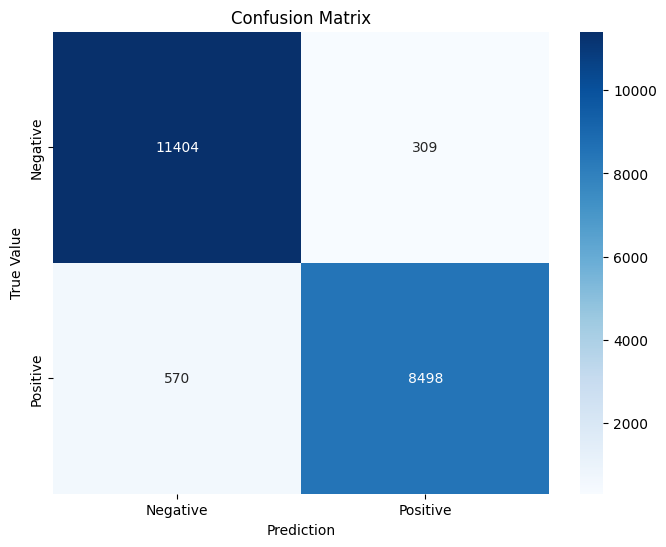

In [33]:
conf_matrix = confusion_matrix(y_val, y_val_pred)
labels = ['Negative', 'Positive']

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Prediction')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()